<a href="https://colab.research.google.com/github/giolml/giolml-Variance-and-sample-standard-deviation-in-python/blob/main/Varianza_y_desviaci%C3%B3n_estandar_muestral_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importamos las librerias necesarias para el análisis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Leemos la base de datos a trabajar en nuestra ruta de origen

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-witdth','class']
iris = pd.read_csv(url, names = names)

In [ ]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-witdth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


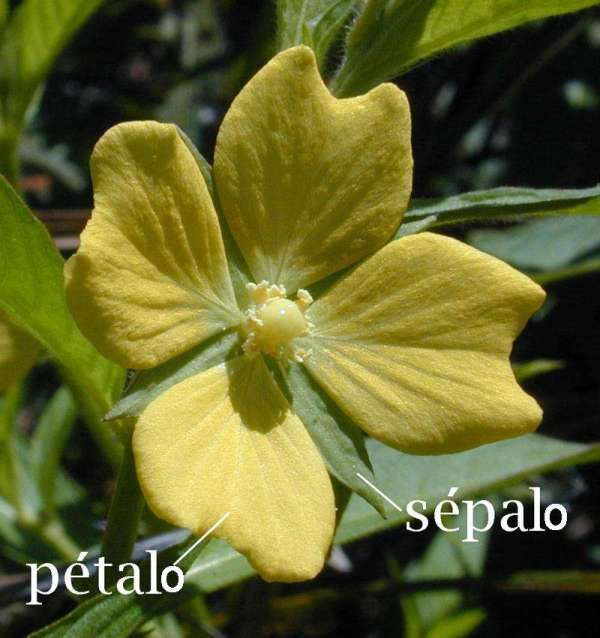

(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <a list of 36 Patch objects>)

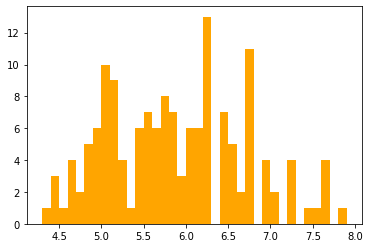

In [ ]:
plt.hist(iris['sepal-length'], color = 'orange', bins = int(180/5))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


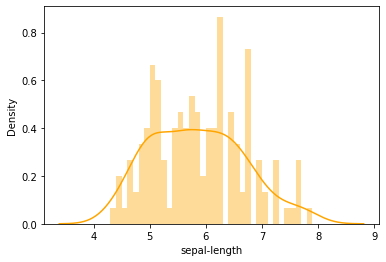

In [ ]:
sns.distplot(iris['sepal-length'],hist=True, kde=True, bins=int(180/5), color = 'orange')

### Calculo de la varianza

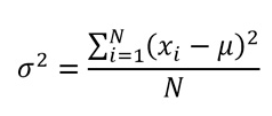

In [ ]:
iris['sepal-lenght'].var()

KeyError: ignored

#Tipos de pruebas de hipotesis

###Importar las librerias necesarias para el analisis

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

### De nuevo usaremos la base de datos iris

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-witdth','class']
iris = pd.read_csv(url, names = names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-witdth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Tipos de pruebas

### Distribución t de Student

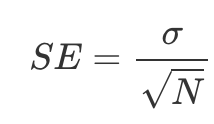

In [ ]:
se_length = iris.std()['sepal-length']/np.sqrt(10)
se_width = iris.std()['sepal-width']/np.sqrt(10)

<ipython-input-16-dfa5f4d17737>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_length = iris.std()['sepal-length']/np.sqrt(10)
<ipython-input-16-dfa5f4d17737>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_width = iris.std()['sepal-width']/np.sqrt(10)


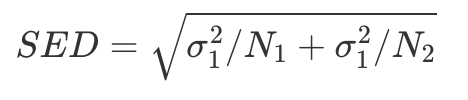

In [ ]:
sed = np.sqrt((se_length**2)+(se_width**2))

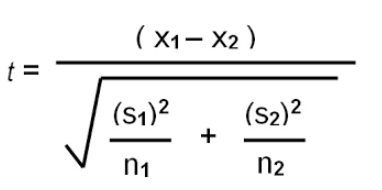

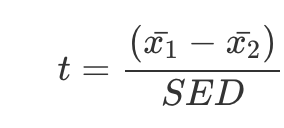

In [ ]:
t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed
t_stat

<ipython-input-18-906994a1a2e5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed


9.436693738890318

In [ ]:
p = ttest_ind(iris['sepal-length'],iris['sepal-width'])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

###Correlación y coeficiente de pearson

In [ ]:
iris['sepal-length'].corr(iris['sepal-width'])

-0.10936924995064937

In [ ]:
st.pearsonr(iris['sepal-length'],iris['sepal-width'])

(-0.10936924995064937, 0.1827652152713699)

### Análisis de la varianza (ANOVA)

In [ ]:
f_oneway(iris['sepal-length'],iris['sepal-width'])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

#Bootstrapping en Python

### Importamos las librerias necesarias para el análisis

In [ ]:
import pandas as pd 
import numpy as np
import random

In [ ]:
data = np.random.normal(loc=34, size = 10000)
data

array([34.36476843, 34.67392623, 35.39471866, ..., 34.47596804,
       34.77385438, 35.09482973])

In [ ]:
data.mean()

34.013547992342666

### Iniciamos bootstrapping para calcular el promedio de edades

In [ ]:
promedio = []
for i in range(40):
  muestra = random.sample(data.tolist(),5)
  prom = np.mean(muestra)
  promedio.append(prom)

In [ ]:
np.mean(promedio)

33.985754372530934

#Validación cruzada en Python

### Importamos las librerías necesarias para el análisis

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded["data.csv"]))
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [ ]:
y.value_counts()

Series([], Name: diagnosis, dtype: int64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)
resultado = modelo.score(x_test, y_test)
print(resultado)

ValueError: ignored

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo = DecisionTreeClassifier()
kfold_validacion=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo, x, y, cv = kfold_validacion)
print(resultados)
resultados.mean()

ValueError: ignored